In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import math

Marginal Posterior Dist. of mu

From Chapter3, we learned that under normal data with nonimformative prior, we can obtain marginal posterior dist of mu by integration and it follows t dist.

p(mu|sigma^2,y) ~t(df=n-1, loc=ybar, scale=sd/sqrt(n))

what we want to do in this example is compare Marginal Posterior Dist by integration and sampling

In [12]:
#Given data
ybar = 26.2
sd = 10.8
n = 66
scale = math.sqrt(sd**2/n)
t_025 = t.ppf(q=0.025, df=n-1, loc=ybar, scale=scale)
t_975 = t.ppf(q=0.975, df=n-1, loc=ybar, scale=scale)
print('CI of marginal posterior dist. of mu: [{:.4f},{:.4f}]'.format(
    t_025, t_975))


CI of marginal posterior dist. of mu: [23.5450,28.8550]


Sampling

In [14]:
np.random.seed(1)
mu_list = []

###########HOMEWORK############
#Fill in for in loop!
#You can use hint, or create new code!
for i in range(1000):
    #hint: to get random number from chisquare dist, you can use np.random.chisquare(df=)
    #
    #hint: to get random number from normal dist, you can use np.random.normal(loc=, scale=)
    #note: normally, scale has standard deviation form/ NOT Variation form
    #append mu to mu_list

mu_list.sort()
mu_median = (mu_list[499]+mu_list[500])/2
mu_025 = mu_list[24]
mu_975 = mu_list[974]
print('Median: {:.4f}'.format(mu_median))
print('2.5%  Percentile: {:.4f}'.format(mu_025))
print('97.5% Precentile: {:.4f}'.format(mu_975))

Median: 26.2248
2.5%  Percentile: 23.4232
97.5% Precentile: 28.7603


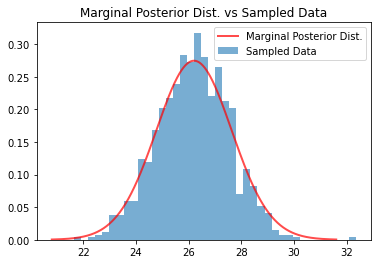

In [15]:
x = np.linspace(ybar-0.5*sd, ybar+0.5*sd, 1000)

plt.plot(x, t.pdf(x=x, df=n-1, loc=ybar, scale=scale), 'r-',
         lw=2, alpha=0.7, label='Marginal Posterior Dist.')
plt.hist(mu_list, bins=40, label='Sampled Data', alpha=0.6, density=True)
plt.title("Marginal Posterior Dist. vs Sampled Data")
plt.legend()
plt.show()
